In [3]:
from pysal.contrib.spint.gravity import  BaseGravity, Gravity, Production, Attraction, Doubly
import pysal as ps
import pandas as pd
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


In [4]:
#Load NYC bike data - trips between census tract centroids
df = pd.read_csv('london_flows.csv')
df.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [5]:
#Process data

#Set zero attirbute values to a small constant
df['flows'] *= 100
df.ix[df.flows == 0, 'flows'] = 1
df.ix[df.population == 0, 'population'] = 1
df.ix[df.jobs == 0, 'jobs'] = 1

#Flows between tracts
flows = df['flows'].values.reshape((-1,1))

#Origin variables: square footage of buildings, housing units, total station capacity
o_vars = df['population'].values.reshape((-1,1))

#Destination variables: square footage of buildings, housing units, total station capacity
d_vars = df['jobs'].values.reshape((-1,1))

#Trip "cost" in time (seconds)
cost = df['distance'].values.reshape((-1,1))

#Origin ids
o = df['station_origin'].astype(str).values.reshape((-1,1))

#destination ids
d = df['station_destination'].astype(str).values.reshape((-1,1))

print len(df), ' OD pairs between census tracts after filtering out intrazonal flows'

61474  OD pairs between census tracts after filtering out intrazonal flows


/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [6]:
#First we fit a basic gravity model and examine the parameters and model fit

grav= Gravity(flows, o_vars, d_vars, cost, 'exp')
paras = grav.params

print grav.params

print 'Adjusted psuedo R2: ', grav.adj_pseudoR2
print 'Adjusted D2: ', grav.adj_D2
print 'SRMSE: ', grav.SRMSE
print 'Sorensen similarity index: ', grav.SSI


[-3.28260635e+00  6.98513738e-01  7.33847380e-01 -8.91320149e-05]
Adjusted psuedo R2:  0.611104915299633
Adjusted D2:  0.6115007235760112
SRMSE:  4.247664506651643
Sorensen similarity index:  0.4153195978592853


In [7]:
df['flow_hat'] = np.exp(paras[0] + paras[1] * np.log(df['population']) + paras[2] * np.log(df['jobs']) + paras[3] * np.log(df['distance']))
df.ix[df.station_destination == 'Canary Wharf', 'jobs'] *= 0.5
df.ix[df.station_destination == 'Canary Wharf', 'flows'] *= 0.5
df['new_flow'] = np.exp(paras[0] + paras[1] * np.log(df['population']) + paras[2] * np.log(df['jobs']) + paras[3] * np.log(df['distance']))


/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero enco

/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


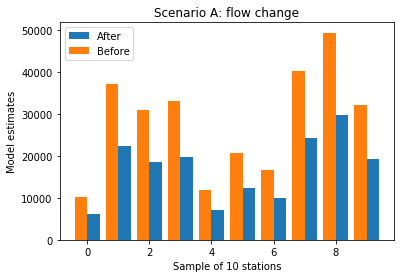

In [8]:
X = df.ix[df.station_destination == 'Canary Wharf', 'new_flow'][:10]
Y = df.ix[df.station_destination == 'Canary Wharf', 'flow_hat'][:10]
X_axis = np.arange(len(X[:10]))

plt.bar(X_axis + 0.2, X, 0.4, label = 'After')
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Before')
plt.xlabel("Sample of 10 stations")
plt.ylabel("Model estimates")
plt.title("Scenario A: flow change")
plt.legend()
plt.show()

Scenario 2:

In [28]:
df.ix[df.station_destination == 'Canary Wharf', 'jobs'] *= 2
df.ix[df.station_destination == 'Canary Wharf', 'flows'] *= 2


/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [33]:
new_beta = paras[3] * 100
df['new_flow2'] = np.exp(paras[0] + paras[1] * np.log(df['population']) + paras[2] * np.log(df['jobs']) + new_beta * np.log(df['distance']))


/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


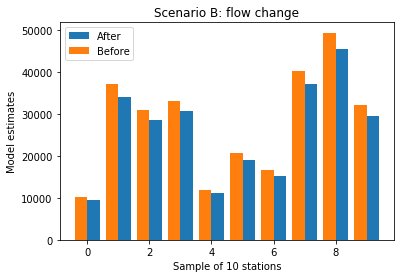

In [34]:
X = df.ix[df.station_destination == 'Canary Wharf', 'new_flow2'][:10]
Y = df.ix[df.station_destination == 'Canary Wharf', 'flow_hat'][:10]
X_axis = np.arange(len(X[:10]))

plt.bar(X_axis + 0.2, X, 0.4, label = 'After')
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Before')
plt.xlabel("Sample of 10 stations")
plt.ylabel("Model estimates")
plt.title("Scenario B: flow change")
plt.legend()
plt.show()

In [35]:
new_beta = paras[3] * 1000
df['new_flow2'] = np.exp(paras[0] + paras[1] * np.log(df['population']) + paras[2] * np.log(df['jobs']) + new_beta * np.log(df['distance']))


/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/matrix/.conda/envs/sal/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


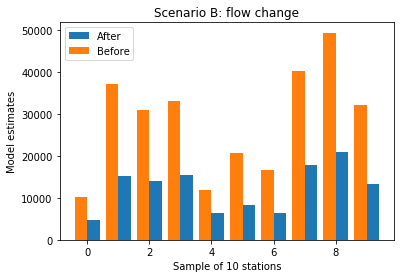

In [36]:
X = df.ix[df.station_destination == 'Canary Wharf', 'new_flow2'][:10]
Y = df.ix[df.station_destination == 'Canary Wharf', 'flow_hat'][:10]
X_axis = np.arange(len(X[:10]))

plt.bar(X_axis + 0.2, X, 0.4, label = 'After')
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Before')
plt.xlabel("Sample of 10 stations")
plt.ylabel("Model estimates")
plt.title("Scenario B: flow change")
plt.legend()
plt.show()